# Remove Distrotion from an edi

In [1]:
import os
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams['savefig.dpi'] = 300

In [2]:
import mtpy.core.mt as mt

## Input .edi file name

In [3]:
#DATA_DIR=r'E:\GitHubz\mtpy2\examples\data'  # Windows PC

DATA_DIR=r'/Softlab/Githubz/mtpy2/examples/data'  #VDI: /g/data/ha3/fxz547
edi_fn = os.path.join(DATA_DIR, 'edi_files/pb40c.edi')

In [4]:
mt_obj = mt.MT(edi_fn)

Could not find any Tipper data.
Read in edi file for station pb40


/Softlab/Githubz/mtpy2/mtpy/analysis/zinvariants.py:228: RuntimeWarning: invalid value encountered in arcsin
  strikeangerr = abs(.5*np.arcsin(inv7))*(180/np.pi)


## Plot MT response

Could not find any Tipper data.
Read in edi file for station pb40


/Softlab/Githubz/mtpy2/mtpy/imaging/mtplottools.py:824: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  if edi_obj.Tipper.tipper == None:
/Softlab/Githubz/mtpy2/mtpy/imaging/mtplottools.py:392: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  if self._Z.freq == None:
/Softlab/Githubz/mtpy2/mtpy/imaging/mtplottools.py:471: RuntimeWarning: invalid value encountered in double_scalars
  zdetvar = np.array([np.linalg.det(zzv)**.5 for zzv in self._Z.z_err])


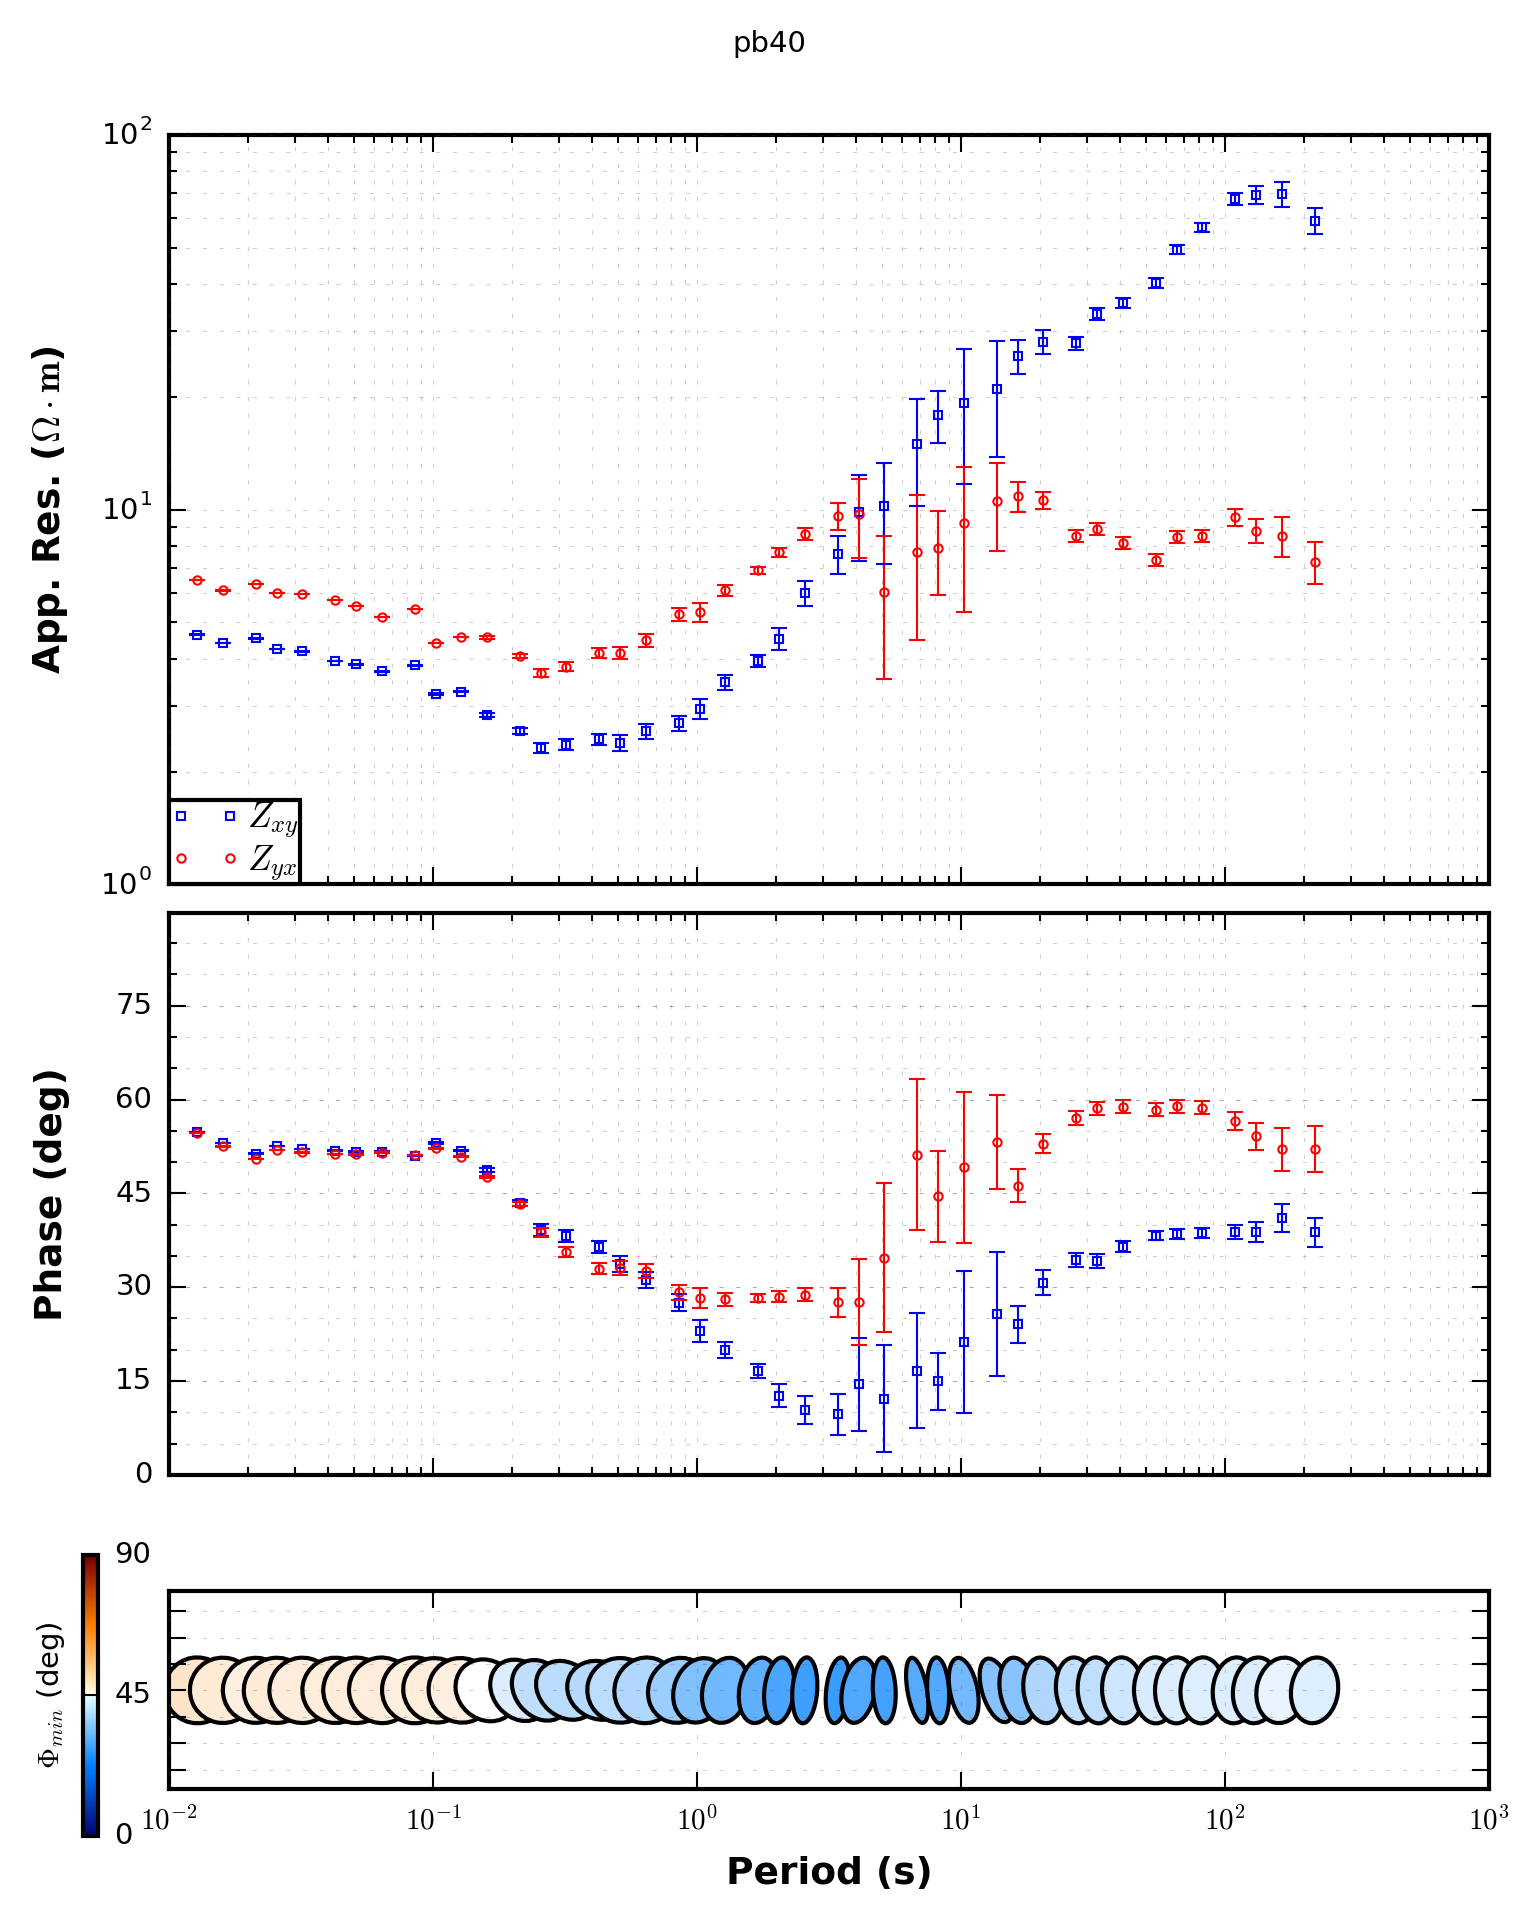

In [5]:
mt_plot = mt_obj.plot_mt_response(plot_pt='y')

In [6]:
help(mt_obj.remove_distortion)

Help on method remove_distortion in module mtpy.core.mt:

remove_distortion(self, num_freq=None) method of mtpy.core.mt.MT instance
    remove distortion following Bibby et al. [2005].
    
    Example
    ----------
    :Remove Distortion and Write New .edi: ::
    
        >>> import mtpy.core.mt as mt
        >>> mt1 = mt.MT(fn=r"/home/mt/edi_files/mt01.edi")
        >>> D, new_z = mt1.remove_distortion()
        >>> mt1.write_edi_file(new_fn=r"/home/mt/edi_files/mt01_dr.edi",            >>>                    new_Z=new_z)



In [7]:
# OR 
mt_obj.remove_distortion?

## Remove distortion following Bibby et al. (2005)

In [8]:
distortion, new_z = mt_obj.remove_distortion()
print distortion
mt_obj.write_edi_file(new_fn=r"/tmp/pb40c_dr.edi",  new_Z=new_z)

[[ 0.91646694  0.07193551]
 [-0.01232709  1.09030773]]
Converted input latitude to decimal degrees: -30.208029
Converted input longitude to decimal degrees:  139.701170
Writing out data a impedances
Wrote /tmp/pb40c_dr.edi


## Plot new MT response

Could not find any Tipper data.
Read in edi file for station pb40
Could not find any Tipper data.
Read in edi file for station pb40


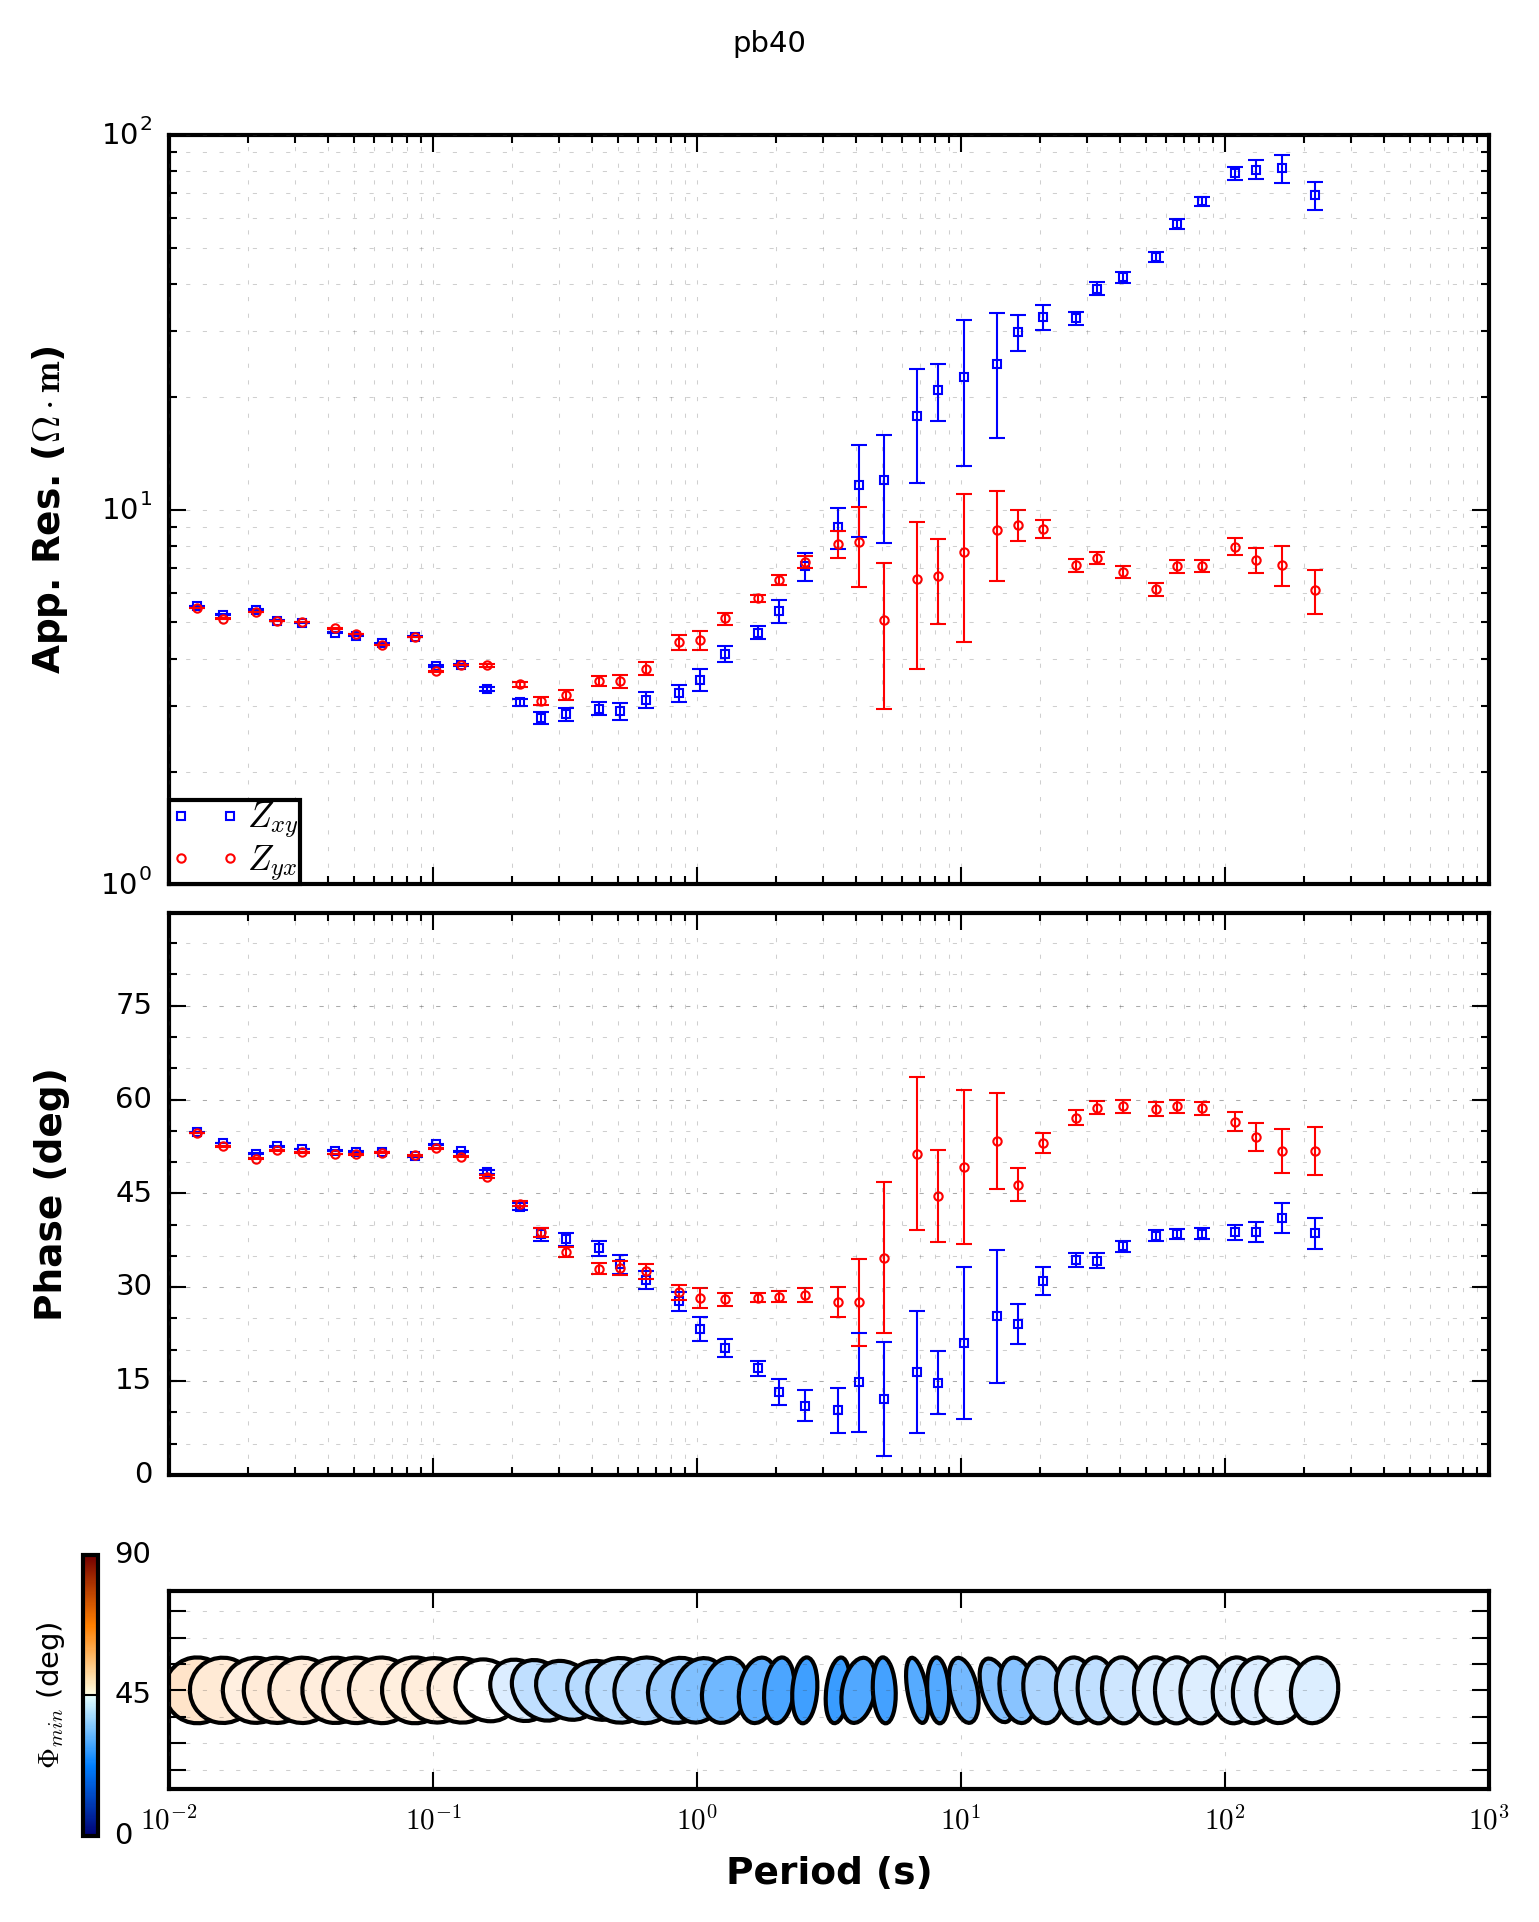

In [9]:
mt_obj_dr = mt.MT(r"/tmp/pb40c_dr.edi")
mt_plot_dr = mt_obj_dr.plot_mt_response(plot_pt='y')